<a href="https://colab.research.google.com/github/shr968/marvel/blob/main/Linear_reg_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1dr5NOl4B08jROq-Q6DKvK5CIIM1N2bev
To: /content/house_price_data.txt
100%|██████████| 751/751 [00:00<00:00, 2.02MB/s]


Data after manual splitting:
   housesize rooms   price
0      2104     3  399900
1      1600     3  329900
2      2400     3  369000
3      1416     2  232000
4      3000     4  539900


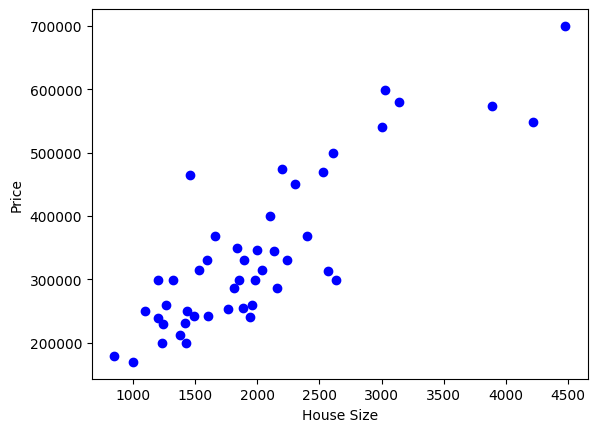

Cost:  [[2.06126963e+09]]
Parameters:  [[338658.2492493 ]
 [103322.82942954]
 [  -474.74249522]]


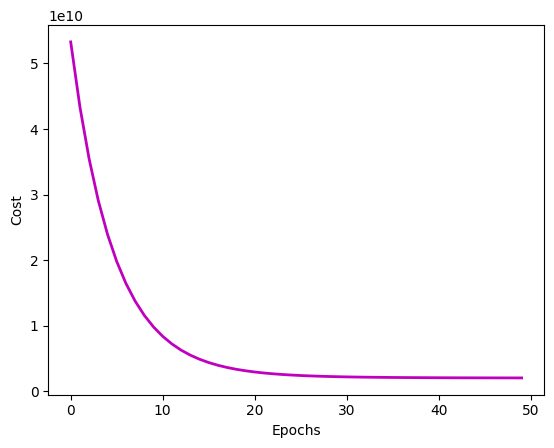

Price of house:  [1.65653761e+08]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown

url = "https://drive.google.com/uc?id=1dr5NOl4B08jROq-Q6DKvK5CIIM1N2bev"
output = "house_price_data.txt"
gdown.download(url, output, quiet=False)

mu = []
std = []

def load_data(filename):
    df = pd.read_csv(filename, header=None)
    df = df[0].str.split(',', expand=True)
    df.columns = ["housesize", "rooms", "price"]
    print("Data after manual splitting:\n", df.head())

    data = np.array(df, dtype=float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]

def plot_data(x, y):
    plt.xlabel('House Size')
    plt.ylabel('Price')
    plt.plot(x[:, 0], y, 'bo')
    plt.show()

def normalize(data):
    for i in range(0, data.shape[1] - 1):
        data[:, i] = (data[:, i] - np.mean(data[:, i])) / np.std(data[:, i])
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))

def h(x, theta):
    return np.matmul(x, theta)

def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

def plot_cost(J_all, num_epochs):
    J_all = np.array(J_all).flatten()
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(range(num_epochs), J_all, 'm', linewidth=2)
    plt.show()

def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

x, y = load_data(output)
y = np.reshape(y, (y.shape[0], 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50

theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

plot_cost(J_all, num_epochs)

test(theta, [1600, 3])
